# Liveability scoring
Liveability score is essential to measure the importance of various factors consisted of liveability.
<br>
In this project, it is decided to use customized weights by conducting user survey via web service and scoring the liveability based on the weights.
<br>

- First, standardizate the different measurements.
- Second, Rank them by categories.
- Finally, Score and weight them.

## Read the data

In [149]:
import pandas as pd
COL = ["min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "population_density", "crime_cases", "weekly_rent"]
sample = pd.read_csv("../../data/curated/merged_dataset/2013_merged_data.csv")
m = sample[COL].to_numpy()
m

array([[3.556825e+01, 2.135025e+01, 2.204660e+01, ..., 8.533000e+03,
        8.600000e+01, 3.000000e+02],
       [7.543550e+00, 7.429720e+00, 6.281770e+00, ..., 1.373900e+04,
        3.600000e+01, 2.150000e+02],
       [5.085341e+01, 3.663541e+01, 8.478000e-02, ..., 8.533000e+03,
        8.600000e+01, 1.750000e+02],
       ...,
       [1.288061e+01, 1.272350e+01, 1.525938e+01, ..., 1.114100e+04,
        5.424000e+03, 3.500000e+02],
       [5.286500e-01, 2.290756e+01, 2.693800e-01, ..., 8.564000e+03,
        1.140000e+02, 2.250000e+02],
       [         nan,          nan,          nan, ..., 5.269000e+03,
        2.100000e+01, 2.000000e+02]])

In [150]:
from sklearn import preprocessing
import numpy as np

## Data standardization

In [151]:
X_train = m
scaler = preprocessing.StandardScaler().fit(X_train)
# scaler
# scaler.mean_
# scaler.scale_

plot histogram

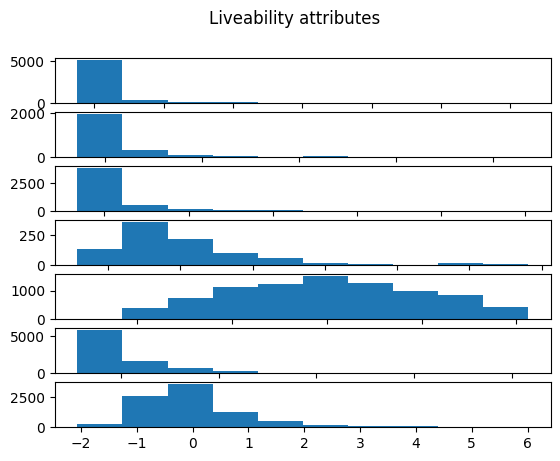

In [152]:
import matplotlib.pyplot as plt
X_scaled = scaler.transform(X_train)
X_scaled
fig, axs = plt.subplots(X_scaled.shape[1])
fig.suptitle('Liveability attributes')
for i in range(0, X_scaled.shape[1]):
    axs[i].hist(X_scaled[:,i])
plt.show()

<b>QQ-plot</b>
<br>
- In QQ-plot, there are strong evidences that most of liveability attributes are not normally distributed.
<br>
- 6th attribute has normal distribution but it is under-dispersed (more concentrated around a central value).
<br>
- Therefore, it is not recommanded to standardise using normal distribution.

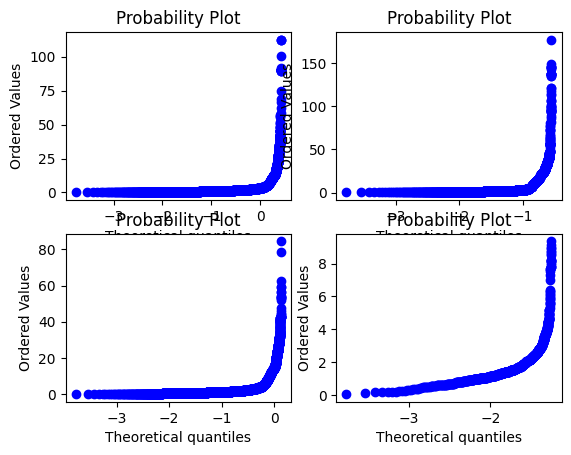

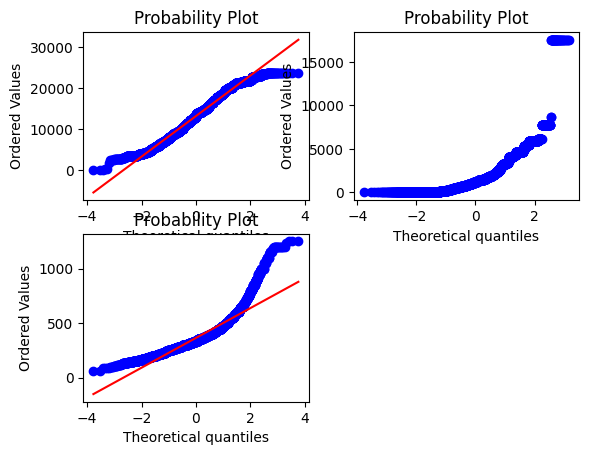

In [153]:
import numpy as np
import scipy.stats as stats
import pylab

# test = np.random.normal(0,1, 1000) # Good example
for i in range(0, 4):
    ax1 = plt.subplot(221+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

for i in range(4, X_scaled.shape[1]):
    ax1 = plt.subplot(217+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


QQ-plot expanded <b>(Log-model)</b>
- Relatively, it doesn't seem to fit well.

/var/folders/sm/l6vrftmd479f6k9xsr1dflsr0000gn/T/ipykernel_25933/3085801141.py:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(test), line='45')


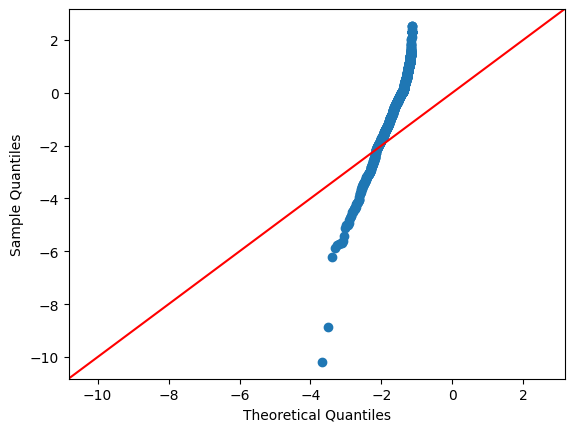

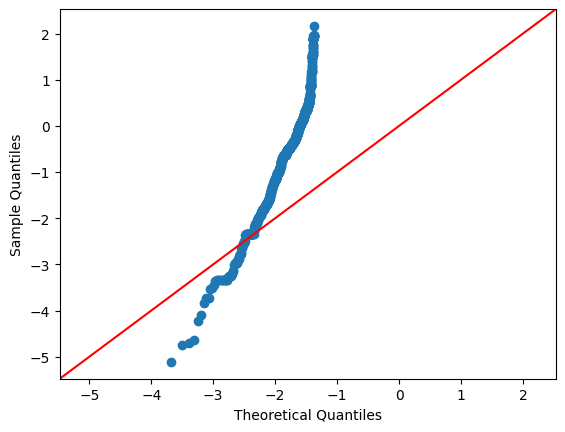

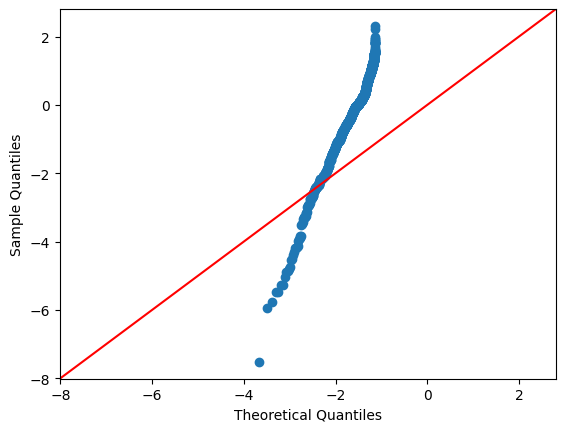

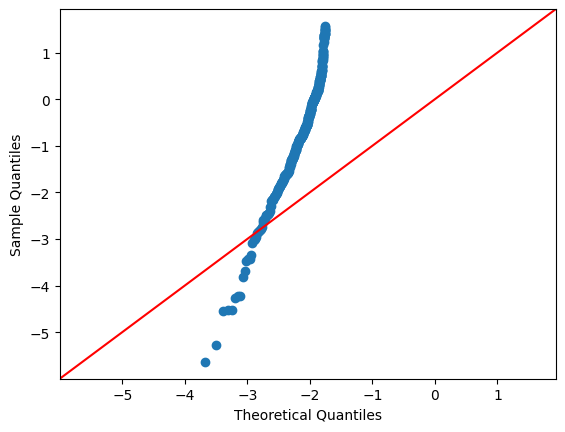

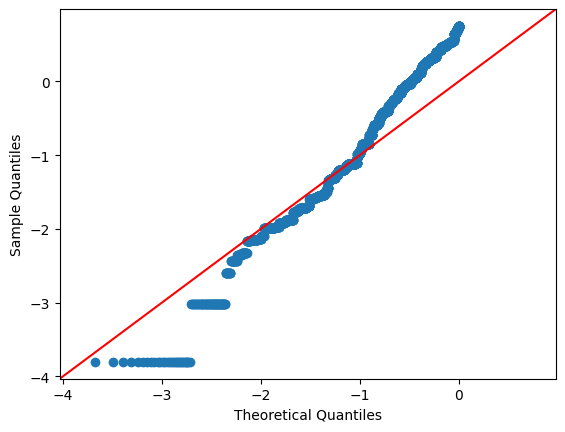

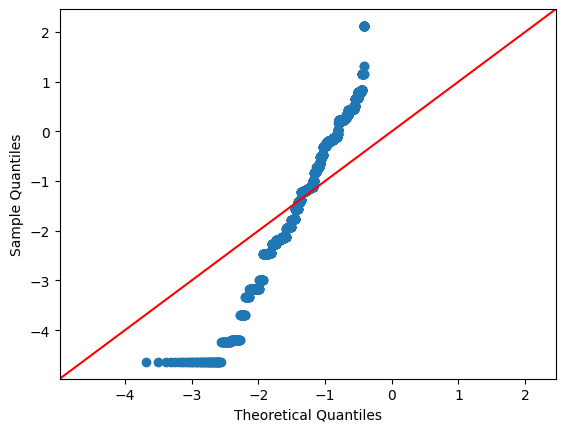

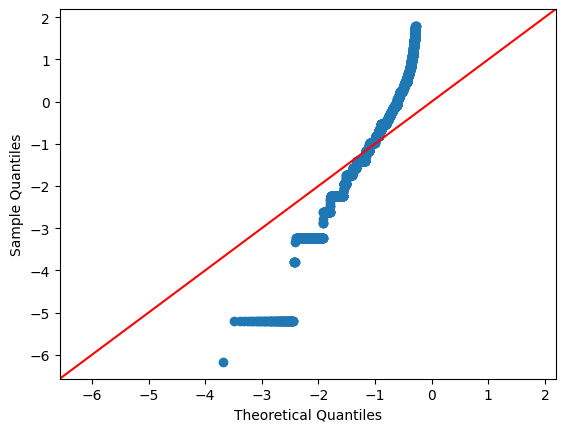

In [154]:
import numpy as np 
import statsmodels.api as sm
import pylab

for i in range(0, X_scaled.shape[1]):
    test = X_scaled[:,i]
    sm.qqplot(np.log(test), line='45')
pylab.show()
    

## Ranking
- As the attributes are not nomally distributed, it is decided to use ranking to score the liveability

In [190]:
ranking = pd.DataFrame()
for col in COL:
    ranking[col] = sample[col].rank(ascending=False)


In [191]:
score = ranking/len(ranking)
score

min_distance_to_train  min_distance_to_hosp  min_distance_to_poli  \
0                  0.010266              0.050397              0.029865   
1                  0.087144              0.094844              0.114676   
2                  0.003383              0.020065              0.547364   
3                  0.062004                   NaN                   NaN   
4                  0.246325                   NaN                   NaN   
...                     ...                   ...                   ...   
8567               0.395474              0.186421              0.315796   
8568               0.591461                   NaN              0.437238   
8569               0.049930              0.076412              0.047014   
8570               0.604293              0.045030              0.538614   
8571                    NaN                   NaN                   NaN   

      min_distance_to_shop  population_density  crime_cases  weekly_rent  
0                      NaN            0.810546     0.898973     0.645590  
1                      NaN            0.482851     0.948378     0.914139  
2                      NaN            0.810546     0.898973     0.969610  
3                      NaN            0.142324     0.474335     0.440096  
4                 0.010208            0.040714     0.296780     0.747608  
...                    ...                 ...          ...          ...  
8567                   NaN            0.585394     0.348052     0.545089  
8568                   NaN            0.383691     0.270007     0.440096  
8569                   NaN            0.635149     0.039139     0.440096  
8570                   NaN            0.806871     0.885558     0.893082  
8571                   NaN            0.943479     0.969552     0.935721  

[8572 rows x 7 columns]

## Scoring

In [186]:
def liveability_scoring(scores, cols, weights):
    """Takes score data, list of weights and column names, return the total liveability score based on the weights"""
    # check the validation of weight list
    if len(weights) != len(cols):
        return np.nan
    if sum(weights) != 1:
        return np.nan
    
    # initialize the values
    scores["total_liveability_score"] = 0

    # calculate the total liveability
    for i, rows in scores.iterrows():
        list_sum = 0
        for n in range(0, len(cols)):
            if not np.isnan(scores.loc[i, cols[n]]):
                list_sum = list_sum + (scores.loc[i, cols[n]]*weights[n])
        scores.loc[i, "total_liveability_score"] = list_sum
    return scores

Cacluate customized liveability

In [197]:
weights = [0.5, 0.1, 0.2, 0.1, 0, 0.1, 0]
total_score = liveability_scoring(score, COL, weights)

Write csv of output(Liveability)

In [205]:
import os
new_path = "../../data/curated/scoring/"

if not os.path.exists(new_path):
    os.makedirs(new_path)

total_score =total_score.sort_values(by=['total_liveability_score'], ascending=False)
total_score.to_csv(new_path+"liveability-scoring.csv")